In [1]:
# Importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
# Reading data

train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [4]:
train.head(10)

,id,created_at,campaign_var_1,campaign_var_2,products_purchased,signup_date,user_activity_var_1,user_activity_var_2,user_activity_var_3,user_activity_var_4,user_activity_var_5,user_activity_var_6,user_activity_var_7,user_activity_var_8,user_activity_var_9,user_activity_var_10,user_activity_var_11,user_activity_var_12,buy
0,1,2021-01-01,1,2,2.0,2020-09-24,0,0,0,0,0,0,1,1,0,0,0,0,0
1,2,2021-01-01,2,1,2.0,2020-09-19,1,0,1,0,0,0,1,0,0,0,0,0,0
2,3,2021-01-01,9,3,3.0,2021-08-11,1,0,0,0,0,0,0,0,0,0,0,0,0
3,4,2021-01-01,6,7,2.0,2017-10-04,0,0,0,0,0,0,0,0,0,0,0,0,0
4,5,2021-01-01,4,6,NaN,2020-06-08,0,0,0,0,0,0,1,0,0,0,1,0,0
5,6,2021-01-01,3,4,3.0,2019-07-02,0,0,0,0,0,1,0,0,0,0,0,0,0
6,7,2021-01-01,5,1,1.0,2019-07-24,0,0,0,0,0,0,0,0,0,0,0,0,0
7,8,2021-01-01,7,3,NaN,2020-12-12,0,0,0,0,0,1,0,0,0,0,1,0,0
8,9,2021-01-01,13,6,3.0,2018-06-21,0,0,0,0,1,0,0,0,0,0,0,0,0
9,10,2021-01-01,3,6,2.0,2021-10-20,0,0,0,0,0,1,0,0,0,0,1,0,0


In [5]:
train.shape

(39161, 19)

In [6]:
# checking for null values in train dataset
train.isnull().sum()

id                          0
created_at                  0
campaign_var_1              0
campaign_var_2              0
products_purchased      20911
signup_date             15113
user_activity_var_1         0
user_activity_var_2         0
user_activity_var_3         0
user_activity_var_4         0
user_activity_var_5         0
user_activity_var_6         0
user_activity_var_7         0
user_activity_var_8         0
user_activity_var_9         0
user_activity_var_10        0
user_activity_var_11        0
user_activity_var_12        0
buy                         0
dtype: int64

In [7]:
train.products_purchased.value_counts()

2.0    8867
3.0    5024
1.0    3643
4.0     716
Name: products_purchased, dtype: int64

In [8]:
# Filling null values for products_purchased with 0

train.products_purchased = train.products_purchased.fillna(0)
test.products_purchased = test.products_purchased.fillna(0)

In [9]:
# Data set is imbalanced as only 5% of leads were successful
train.buy.mean()

0.05102014759582237

In [10]:
# Converted data type of columns from string to datetime
train['created_at']= pd.to_datetime(train['created_at'])
train['signup_date']= pd.to_datetime(train['signup_date'])

test['created_at']= pd.to_datetime(test['created_at'])
test['signup_date']= pd.to_datetime(test['signup_date'])

In [11]:
# Calculated difference between created_at and signup_date
train['no_of_days'] = train['created_at'] - train['signup_date']

test['no_of_days'] = test['created_at'] - test['signup_date']

In [12]:
train

,id,created_at,campaign_var_1,campaign_var_2,products_purchased,signup_date,user_activity_var_1,user_activity_var_2,user_activity_var_3,user_activity_var_4,user_activity_var_5,user_activity_var_6,user_activity_var_7,user_activity_var_8,user_activity_var_9,user_activity_var_10,user_activity_var_11,user_activity_var_12,buy,no_of_days
0,1,2021-01-01,1,2,2.0,2020-09-24,0,0,0,0,0,0,1,1,0,0,0,0,0,99 days
1,2,2021-01-01,2,1,2.0,2020-09-19,1,0,1,0,0,0,1,0,0,0,0,0,0,104 days
2,3,2021-01-01,9,3,3.0,2021-08-11,1,0,0,0,0,0,0,0,0,0,0,0,0,-222 days
3,4,2021-01-01,6,7,2.0,2017-10-04,0,0,0,0,0,0,0,0,0,0,0,0,0,1185 days
4,5,2021-01-01,4,6,0.0,2020-06-08,0,0,0,0,0,0,1,0,0,0,1,0,0,207 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39156,39157,2021-12-31,11,11,2.0,2017-10-19,1,0,0,0,1,1,1,0,0,0,0,0,0,1534 days
39157,39158,2021-12-31,3,9,3.0,NaT,0,0,0,0,0,0,0,0,0,0,0,0,0,NaT
39158,39159,2021-12-31,8,7,2.0,NaT,1,0,0,0,1,0,1,0,0,0,0,0,0,NaT
39159,39160,2021-12-31,7,12,2.0,NaT,0,0,0,0,0,1,0,0,0,0,1,0,0,NaT


In [13]:
# Imputing NaT values with 0 days
train['no_of_days'].fillna(pd.Timedelta(seconds=0),inplace=True)
train.tail()

,id,created_at,campaign_var_1,campaign_var_2,products_purchased,signup_date,user_activity_var_1,user_activity_var_2,user_activity_var_3,user_activity_var_4,user_activity_var_5,user_activity_var_6,user_activity_var_7,user_activity_var_8,user_activity_var_9,user_activity_var_10,user_activity_var_11,user_activity_var_12,buy,no_of_days
39156,39157,2021-12-31,11,11,2.0,2017-10-19,1,0,0,0,1,1,1,0,0,0,0,0,0,1534 days
39157,39158,2021-12-31,3,9,3.0,NaT,0,0,0,0,0,0,0,0,0,0,0,0,0,0 days
39158,39159,2021-12-31,8,7,2.0,NaT,1,0,0,0,1,0,1,0,0,0,0,0,0,0 days
39159,39160,2021-12-31,7,12,2.0,NaT,0,0,0,0,0,1,0,0,0,0,1,0,0,0 days
39160,39161,2021-12-31,2,5,0.0,2019-08-11,1,0,0,0,0,0,1,0,0,0,0,0,0,873 days


In [14]:
test['no_of_days'].fillna(pd.Timedelta(seconds=0),inplace=True)
test.tail()

,id,created_at,campaign_var_1,campaign_var_2,products_purchased,signup_date,user_activity_var_1,user_activity_var_2,user_activity_var_3,user_activity_var_4,user_activity_var_5,user_activity_var_6,user_activity_var_7,user_activity_var_8,user_activity_var_9,user_activity_var_10,user_activity_var_11,user_activity_var_12,no_of_days
13179,52341,2022-03-30,16,12,0.0,NaT,0,0,0,0,0,1,1,0,0,0,0,0,0 days
13180,52342,2022-03-30,12,8,0.0,2022-03-19,1,0,0,0,0,1,0,0,0,0,0,0,11 days
13181,52343,2022-03-30,14,14,3.0,2021-08-15,0,0,1,0,0,0,1,0,0,0,0,0,227 days
13182,52344,2022-03-30,14,10,0.0,NaT,0,0,0,0,0,0,1,0,0,0,1,0,0 days
13183,52345,2022-03-30,13,13,0.0,NaT,0,0,0,0,0,1,1,1,0,0,1,0,0 days


In [15]:
# dropping columns
train.drop(['created_at','signup_date','id'],axis=1,inplace=True)
test.drop(['created_at','signup_date','id'],axis=1,inplace=True)

In [16]:
train.no_of_days = train.no_of_days.astype(str)

test.no_of_days = test.no_of_days.astype(str)

In [17]:
# stripping number from no_of_days column ,eg : 227 days to 227
train.no_of_days = train.no_of_days.apply(lambda x:x.split('days')[0].rstrip())

test.no_of_days = test.no_of_days.apply(lambda x:x.split('days')[0].rstrip())

In [18]:
train.no_of_days = train.no_of_days.astype('int32')

test.no_of_days = test.no_of_days.astype('int32')

In [19]:
# method to classify signup of the leads
def singedup(x):
    if x>0:
        return 'Before'
    elif x<0:
        return 'After'
    else:
        return 'Not Signed Up'
    
train['SignedUp'] = train.no_of_days.apply(singedup)
test['SignedUp'] = test.no_of_days.apply(singedup)

In [20]:
# dropping no_of_days
train.drop(['no_of_days'],axis=1,inplace=True)

test.drop(['no_of_days'],axis=1,inplace=True)

In [21]:
# Final check for null values
test.isnull().sum()

campaign_var_1          0
campaign_var_2          0
products_purchased      0
user_activity_var_1     0
user_activity_var_2     0
user_activity_var_3     0
user_activity_var_4     0
user_activity_var_5     0
user_activity_var_6     0
user_activity_var_7     0
user_activity_var_8     0
user_activity_var_9     0
user_activity_var_10    0
user_activity_var_11    0
user_activity_var_12    0
SignedUp                0
dtype: int64

In [22]:
train.isnull().sum()

campaign_var_1          0
campaign_var_2          0
products_purchased      0
user_activity_var_1     0
user_activity_var_2     0
user_activity_var_3     0
user_activity_var_4     0
user_activity_var_5     0
user_activity_var_6     0
user_activity_var_7     0
user_activity_var_8     0
user_activity_var_9     0
user_activity_var_10    0
user_activity_var_11    0
user_activity_var_12    0
buy                     0
SignedUp                0
dtype: int64

<AxesSubplot:xlabel='SignedUp', ylabel='count'>

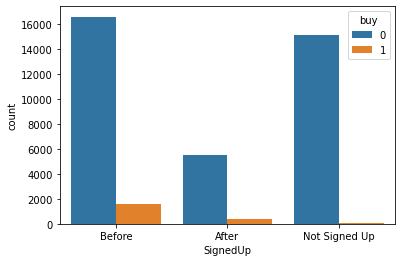

In [23]:
sns.countplot(x="SignedUp", hue="buy", data=train)

In [24]:
train.pivot_table(index =['SignedUp'], values =['buy'], 
                       aggfunc ={'sum','count','mean'})

buy                  
                 count      mean     sum
SignedUp                                
After           5844.0  0.061431   359.0
Before         18182.0  0.088659  1612.0
Not Signed Up  15135.0  0.001784    27.0

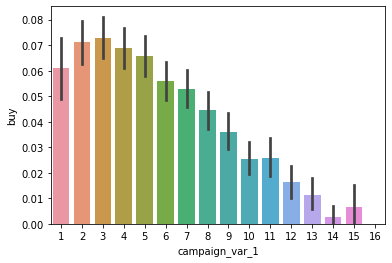

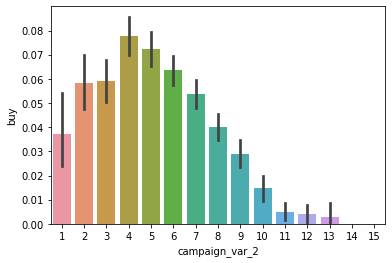

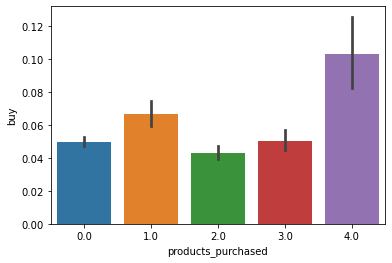

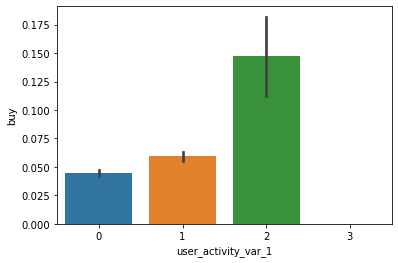

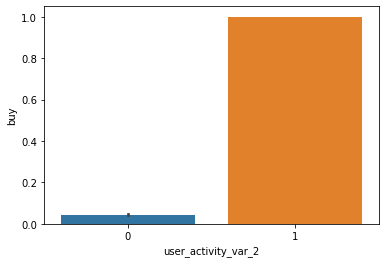

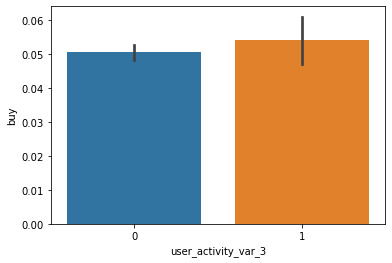

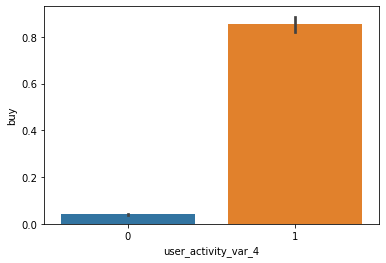

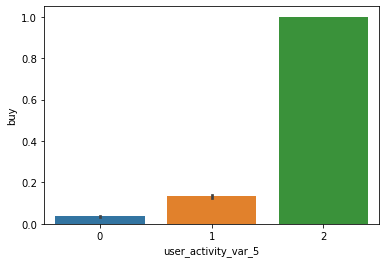

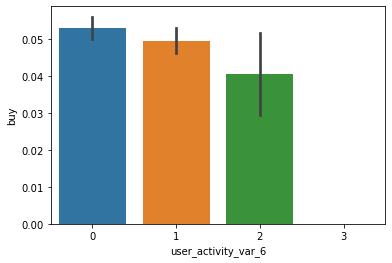

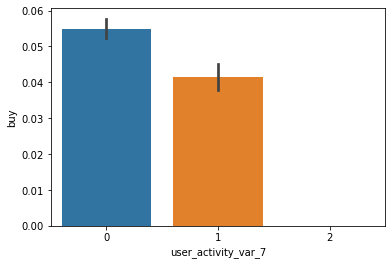

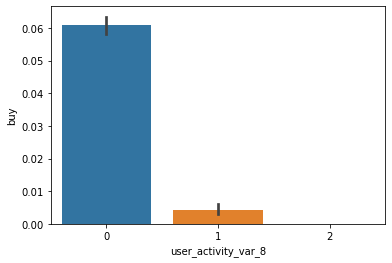

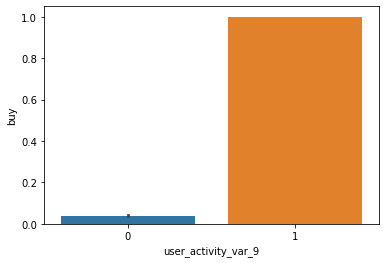

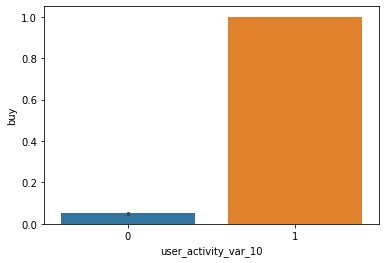

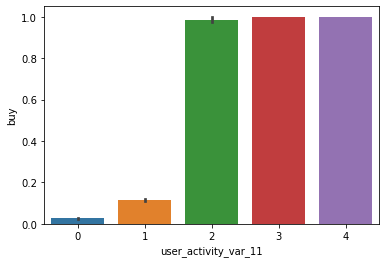

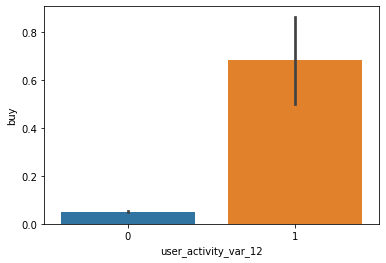

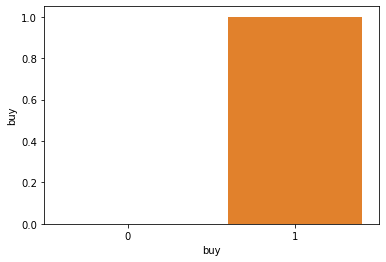

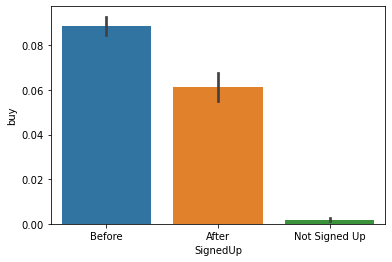

In [25]:
# All features have some differentiating factor, deleting none of them
for col in (train.columns):
    plt.figure()
    sns.barplot(x=col, y="buy",data=train, estimator=np.mean )
plt.show()

In [26]:
train.drop(['user_activity_var_3'],inplace=True,axis=1)
test.drop(['user_activity_var_3'],inplace=True,axis=1)

<AxesSubplot:>

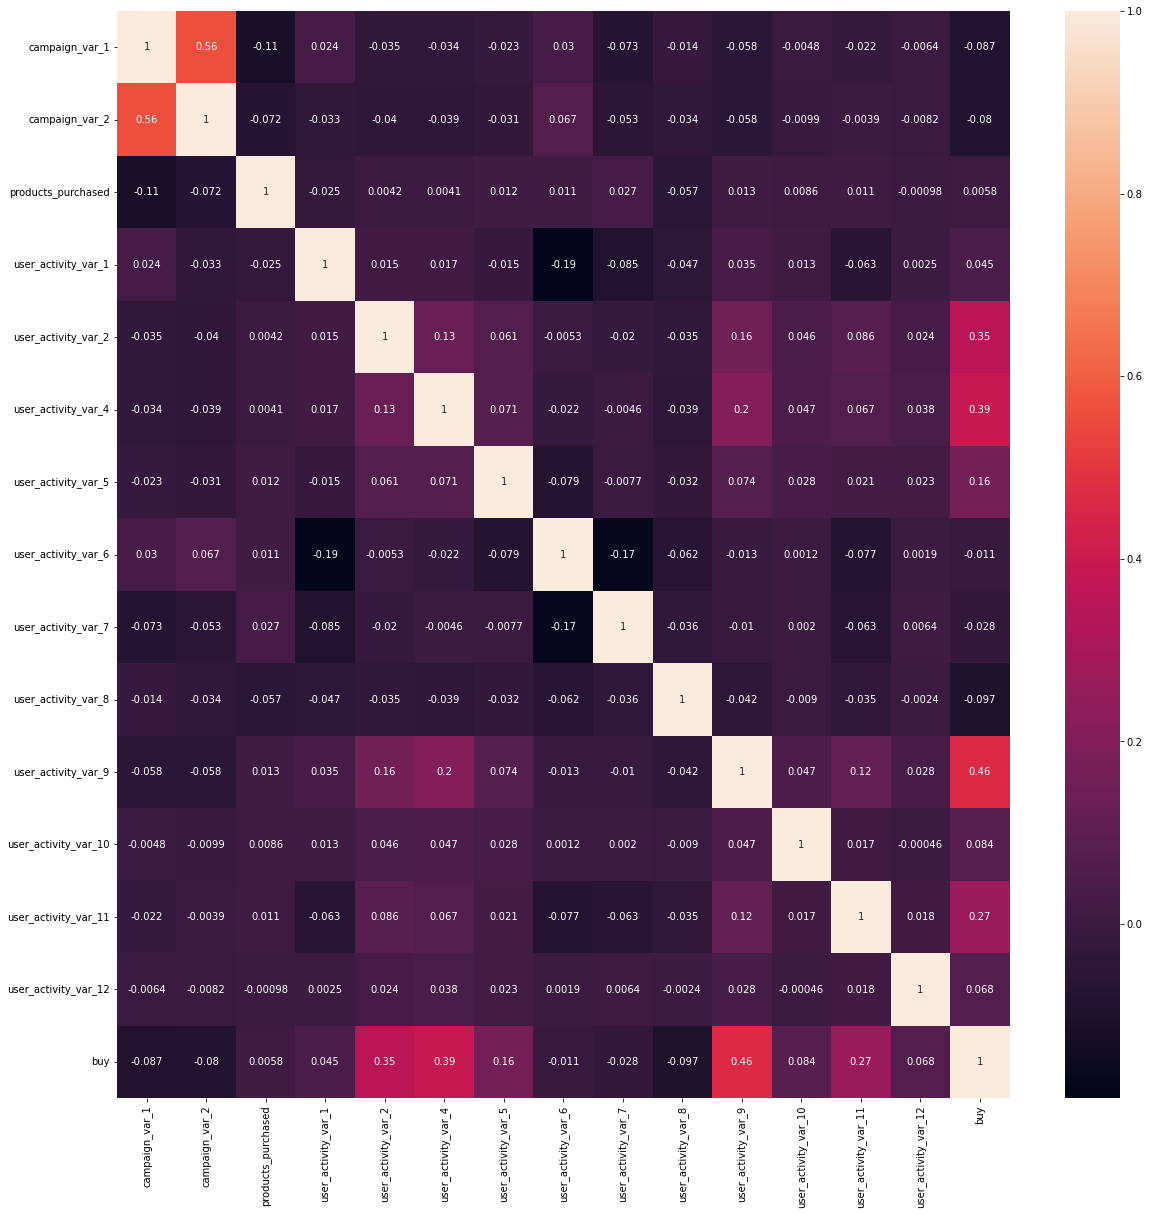

In [27]:
plt.figure(figsize=(20,20))
sns.heatmap(train.corr(),annot=True)

In [28]:
# differentiating dependent and independent variable
Y=train[['buy']]
X=train.drop(['buy'],axis=1)

In [29]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
X['SignedUp']= label_encoder.fit_transform(X['SignedUp'])
test['SignedUp']= label_encoder.fit_transform(test['SignedUp'])

In [30]:
# Creating dummies
X = pd.get_dummies(X, drop_first = True)

In [31]:
# making a 70-30 split in training dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X, Y, test_size=0.3, random_state=20)

In [32]:
# checking for any imbalancing in splitted dataset
print("Shape of Training Data",X_train.shape)
print("Shape of Testing Data",X_test.shape)
print("Buying Rate in Training Data",y_train.mean())
print("Buying Rate in Testing Data",y_test.mean())

Shape of Training Data (27412, 15)
Shape of Testing Data (11749, 15)
Buying Rate in Training Data buy    0.050927
dtype: float64
Buying Rate in Testing Data buy    0.051238
dtype: float64


In [33]:
# Building a Decision Tree Model
from sklearn.tree import DecisionTreeClassifier
dtree=DecisionTreeClassifier(criterion='gini',random_state=20)

In [34]:
# Hyperparameter tuning using grid search cv
np.random.seed(44)
from sklearn.model_selection import GridSearchCV
param_dist = {'max_depth': [3,4, 5], 'min_samples_split': [50,120,180,200,250] }
tree_grid = GridSearchCV(dtree, cv = 10, param_grid=param_dist,n_jobs = 3)
tree_grid.fit(X_train,y_train) 
print('Best Parameters using grid search: \n', tree_grid.best_params_)

Best Parameters using grid search: 
 {'max_depth': 5, 'min_samples_split': 50}


In [35]:
dtree=DecisionTreeClassifier(criterion='gini',random_state=20,max_depth=5,min_samples_split=50)
dtree.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=5, min_samples_split=50, random_state=20)

In [36]:
# Building a Random Forest Model
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(criterion='gini',random_state=20,max_depth=5,min_samples_split=50)
rf.fit(X_train,y_train)

RandomForestClassifier(max_depth=5, min_samples_split=50, random_state=20)

In [37]:
# Building a Gradient Boosting Model
from sklearn.ensemble import GradientBoostingClassifier
gbm=GradientBoostingClassifier(criterion='mse',random_state=20,max_depth=5,min_samples_split=50)
gbm.fit(X_train,y_train)

GradientBoostingClassifier(criterion='mse', max_depth=5, min_samples_split=50,
                           random_state=20)

In [38]:
y_pred_tree=dtree.predict(X_test)
y_pred_rf=rf.predict(X_test)
y_pred_gbm=gbm.predict(X_test)

In [39]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix

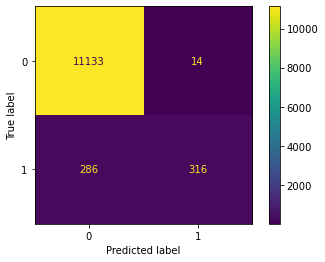

In [40]:
metrics.plot_confusion_matrix(dtree,X_test,y_test)

In [41]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_tree))
print("Precision",metrics.precision_score(y_test,y_pred_tree))
print("Recall",metrics.recall_score(y_test,y_pred_tree))
print("f1_score",metrics.f1_score(y_test,y_pred_tree))

Accuracy: 0.97446591199251
Precision 0.9575757575757575
Recall 0.5249169435215947
f1_score 0.6781115879828326


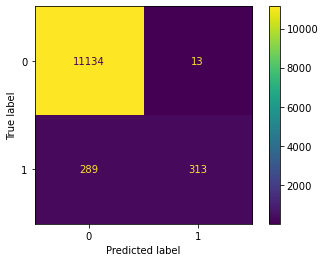

In [42]:
metrics.plot_confusion_matrix(rf,X_test,y_test)

In [43]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_rf))
print("Precision",metrics.precision_score(y_test,y_pred_rf))
print("Recall",metrics.recall_score(y_test,y_pred_rf))
print("f1_score",metrics.f1_score(y_test,y_pred_rf))

Accuracy: 0.9742956847391268
Precision 0.9601226993865031
Recall 0.5199335548172758
f1_score 0.6745689655172414


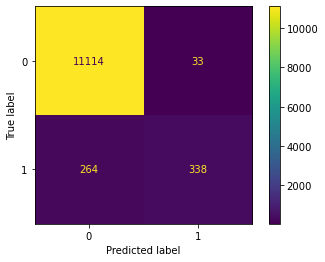

In [44]:
metrics.plot_confusion_matrix(gbm,X_test,y_test)

In [45]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_gbm))
print("Precision",metrics.precision_score(y_test,y_pred_gbm))
print("Recall",metrics.recall_score(y_test,y_pred_gbm))
print("f1_score",metrics.f1_score(y_test,y_pred_gbm))

Accuracy: 0.9747212528725849
Precision 0.9110512129380054
Recall 0.5614617940199336
f1_score 0.694758478931141


In [46]:
#test = pd.get_dummies(test, drop_first = True)

In [47]:
test_pred = gbm.predict(test)

In [48]:
sub = pd.read_csv('sample_submission.csv')
sub.head()

,id,buy
0,39162,1
1,39163,1
2,39164,1
3,39165,1
4,39166,1


In [49]:
sub['buy'] = test_pred
sub.head()

,id,buy
0,39162,1
1,39163,0
2,39164,0
3,39165,1
4,39166,0


In [50]:
sub.to_csv('baseline_gbm.csv',index=False)

In [51]:
gbm2 = GradientBoostingClassifier(criterion='mse',random_state=365,max_depth=5,min_samples_split=55,
                               n_estimators= 150,min_samples_leaf=5,max_features='sqrt',subsample=0.80)
gbm2.fit(X_train,y_train)

GradientBoostingClassifier(criterion='mse', max_depth=5, max_features='sqrt',
                           min_samples_leaf=5, min_samples_split=55,
                           n_estimators=150, random_state=365, subsample=0.8)

In [52]:
y_pred_gbm2=gbm2.predict(X_test)

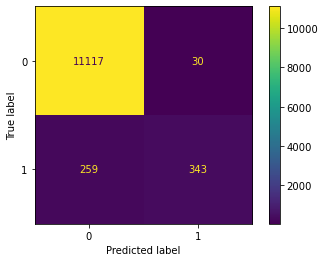

In [53]:
metrics.plot_confusion_matrix(gbm2,X_test,y_test)

In [54]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_gbm2))
print("Precision",metrics.precision_score(y_test,y_pred_gbm2))
print("Recall",metrics.recall_score(y_test,y_pred_gbm2))
print("f1_score",metrics.f1_score(y_test,y_pred_gbm2))

Accuracy: 0.975402161886118
Precision 0.9195710455764075
Recall 0.5697674418604651
f1_score 0.7035897435897436


In [55]:
test_pred_gbm70 = gbm2.predict(test)

In [56]:
sub = pd.read_csv('sample_submission.csv')
sub['buy'] = test_pred_gbm70
sub.to_csv('gbm_70.csv',index=False)

In [57]:
from xgboost import XGBClassifier

xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss',n_estimators=180)
xgb_model.fit(X_train, y_train)


XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric='mlogloss', gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_to_onehot=4, max_delta_step=0, max_depth=6,
              max_leaves=0, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=180, n_jobs=0,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

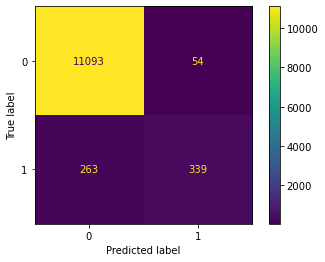

In [58]:
y_pred_xgb=xgb_model.predict(X_test)
metrics.plot_confusion_matrix(xgb_model,X_test,y_test)

In [59]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_xgb))
print("Precision",metrics.precision_score(y_test,y_pred_xgb))
print("Recall",metrics.recall_score(y_test,y_pred_xgb))
print("f1_score",metrics.f1_score(y_test,y_pred_xgb))

Accuracy: 0.9730189803387522
Precision 0.8625954198473282
Recall 0.5631229235880398
f1_score 0.6814070351758794


In [60]:
test_pred_xgb = xgb_model.predict(test)
sub = pd.read_csv('sample_submission.csv')
sub['buy'] = test_pred_xgb
sub.to_csv('xgb.csv',index=False)

In [61]:
import lightgbm as lgb
lgb_model = lgb.LGBMClassifier(learning_rate=0.09,max_depth=-5,random_state=42)
lgb_model.fit(X_train,y_train,eval_set=[(X_test,y_test),(X_train,y_train)],
          verbose=20,eval_metric='logloss')


[20]	training's binary_logloss: 0.0894107	valid_0's binary_logloss: 0.0926752
[40]	training's binary_logloss: 0.078812	valid_0's binary_logloss: 0.0857818
[60]	training's binary_logloss: 0.0743901	valid_0's binary_logloss: 0.0853833
[80]	training's binary_logloss: 0.0714601	valid_0's binary_logloss: 0.0856262
[100]	training's binary_logloss: 0.0692973	valid_0's binary_logloss: 0.08615


LGBMClassifier(learning_rate=0.09, max_depth=-5, random_state=42)

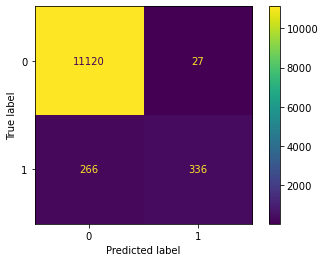

In [62]:
metrics.plot_confusion_matrix(lgb_model,X_test,y_test)

In [63]:
print(metrics.classification_report(y_test,lgb_model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99     11147
           1       0.93      0.56      0.70       602

    accuracy                           0.98     11749
   macro avg       0.95      0.78      0.84     11749
weighted avg       0.97      0.98      0.97     11749



In [64]:
test_pred_lgb = lgb_model.predict(test)
sub = pd.read_csv('sample_submission.csv')
sub['buy'] = test_pred_lgb
sub.to_csv('lgb.csv',index=False)